<a href="https://colab.research.google.com/github/muhsufyan/harga-beras-dan-berita/blob/main/harga_beras_dan_berita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tujuan
1. mengetahui penyebab harga beras tinggi/turun dari berita
2. membuat analisis dan model forecasting untuk harga beras

In [ ]:
import pandas as pd
df = pd.read_csv("/content/harga_beras_bps.csv",sep=";")
df

,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579
1,2017,Februari,11571.24
2,2017,Maret,11494
3,2017,April,11449
4,2017,Mei,11465
5,2017,Juni,11465
6,2017,Juli,11448
7,2017,Agustus,11411
8,2017,September,11481.84
9,2017,Oktober,11552


In [ ]:
df.shape

(45, 3)

In [ ]:
df.dtypes

nama_tahun             int64
nama_turunan_tahun    object
data_content          object
dtype: object

In [ ]:
df['nama_turunan_tahun'].value_counts(),  df['nama_tahun'].value_counts(), df['data_content'].value_counts()

(Februari     4
 Juni         4
 Juli         4
 Maret        4
 Januari      4
 April        4
 Mei          4
 Desember     3
 November     3
 Oktober      3
 Agustus      3
 September    3
 Tahunan      2
 Name: nama_turunan_tahun, dtype: int64, 2018    13
 2017    13
 2019    12
 2020     7
 Name: nama_tahun, dtype: int64, 11465                  2
 12120                  1
 11481.84               1
 12021                  1
 12009                  1
 11449                  1
 12276                  1
 12108                  1
 12212.63               1
 12382.1                1
 121.057.744.677.297    1
 12.211.094.705.599     1
 12035                  1
 12222                  1
 12223.98               1
 119.262.109.314.416    1
 11943                  1
 11899                  1
 12124                  1
 120.544.801.330.707    1
 11494                  1
 119.072.646.547.513    1
 12018                  1
 11579                  1
 12355.15               1
 12008                

dari deskripsi diatas dpt disimpulkan bahwa :
1.  ada data aneh misalnya pd 2019 Desember harga berasnya adlh 121.830.330.305.105 ini sangat tdk mungkin harga beras sprti itu. mengatasinya mungkin dg menghitung jumlah tanda . pada data harga lalu jika > 2 maka kita anggap NaN dan lakukan imputasi
2. data bulan ada yg isinya Tahunan ini hrs dihapus
3. tipe data harga adlh objek sehrsnya int/float maka kita hrs convert
2. data tahun dan bulan sehrsnya disatukan dan tipenya adlh date

solusi masalah ke 2

In [ ]:
df2 = df[df.nama_turunan_tahun != "Tahunan"]

In [ ]:
df2.shape

(43, 3)

In [ ]:
row, col = df2.shape

In [ ]:
df2

,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579
1,2017,Februari,11571.24
2,2017,Maret,11494
3,2017,April,11449
4,2017,Mei,11465
5,2017,Juni,11465
6,2017,Juli,11448
7,2017,Agustus,11411
8,2017,September,11481.84
9,2017,Oktober,11552


In [ ]:
df2[df['nama_turunan_tahun'] == "Tahunan"].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


nama_tahun            0
nama_turunan_tahun    0
data_content          0
dtype: int64

solusi mslh 1

In [ ]:
df2.dtypes

nama_tahun             int64
nama_turunan_tahun    object
data_content          object
dtype: object

In [ ]:
df2["data_content"].str.find(".")

0    -1
1     5
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8     5
9    -1
10    3
11   -1
13   -1
14   -1
15   -1
16   -1
17   -1
18    3
19   -1
20   -1
21   -1
22    3
23   -1
24    3
26    2
27   -1
28   -1
29   -1
30   -1
31   -1
32   -1
33   -1
34   -1
35   -1
36   -1
37    3
38    5
39    5
40   -1
41    5
42    5
43    5
44    5
Name: data_content, dtype: int64

In [ ]:
df3 = df2

In [ ]:
df3

,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579
1,2017,Februari,11571.24
2,2017,Maret,11494
3,2017,April,11449
4,2017,Mei,11465
5,2017,Juni,11465
6,2017,Juli,11448
7,2017,Agustus,11411
8,2017,September,11481.84
9,2017,Oktober,11552


In [ ]:
import numpy as np
fil1 = df3["data_content"].str.find(".") == 2
fil2 = df3["data_content"].str.find(".") == 3
df3.loc[fil1 , "data_content"] = np.nan
df3.loc[fil2 , "data_content"] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
df3.isnull().sum(axis = 0)

nama_tahun            0
nama_turunan_tahun    0
data_content          6
dtype: int64

In [ ]:
df3.dtypes

nama_tahun             int64
nama_turunan_tahun    object
data_content          object
dtype: object

In [ ]:
df3

,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579
1,2017,Februari,11571.24
2,2017,Maret,11494
3,2017,April,11449
4,2017,Mei,11465
5,2017,Juni,11465
6,2017,Juli,11448
7,2017,Agustus,11411
8,2017,September,11481.84
9,2017,Oktober,11552


hapus angka stlh .

In [ ]:
df4 = df3

In [ ]:
df4["data_content"] = df4["data_content"].str.split('.').str[0]
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579
1,2017,Februari,11571
2,2017,Maret,11494
3,2017,April,11449
4,2017,Mei,11465
5,2017,Juni,11465
6,2017,Juli,11448
7,2017,Agustus,11411
8,2017,September,11481
9,2017,Oktober,11552


1. convert data_content/data harga beras jd int
2. gabungkan tahun dan bulan lalu convert jd date

In [ ]:
# convert harga beras
df5 = df4
df5["data_content"] = pd.to_numeric(df5['data_content'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df5.dtypes

nama_tahun              int64
nama_turunan_tahun     object
data_content          float64
dtype: object

In [ ]:
df5

,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579.0
1,2017,Februari,11571.0
2,2017,Maret,11494.0
3,2017,April,11449.0
4,2017,Mei,11465.0
5,2017,Juni,11465.0
6,2017,Juli,11448.0
7,2017,Agustus,11411.0
8,2017,September,11481.0
9,2017,Oktober,11552.0


imputasi data missing value dg metode backfill [contoh](https://stackoverflow.com/questions/49308530/missing-values-in-time-series-in-python)

In [ ]:
df5["data_content"] = df5["data_content"].fillna(value=None, method='backfill', axis=None, limit=None, downcast=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df5

,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579.0
1,2017,Februari,11571.0
2,2017,Maret,11494.0
3,2017,April,11449.0
4,2017,Mei,11465.0
5,2017,Juni,11465.0
6,2017,Juli,11448.0
7,2017,Agustus,11411.0
8,2017,September,11481.0
9,2017,Oktober,11552.0


In [ ]:
df5["data_content"] = df5["data_content"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df5.dtypes

nama_tahun             int64
nama_turunan_tahun    object
data_content           int64
dtype: object

In [ ]:
df6 = df5

In [ ]:
df6

,nama_tahun,nama_turunan_tahun,data_content
0,2017,Januari,11579
1,2017,Februari,11571
2,2017,Maret,11494
3,2017,April,11449
4,2017,Mei,11465
5,2017,Juni,11465
6,2017,Juli,11448
7,2017,Agustus,11411
8,2017,September,11481
9,2017,Oktober,11552


In [ ]:
df6['nama_turunan_tahun'].value_counts()

Juli         4
April        4
Juni         4
Januari      4
Maret        4
Februari     4
Mei          4
November     3
Agustus      3
Desember     3
Oktober      3
September    3
Name: nama_turunan_tahun, dtype: int64

In [ ]:
# change name month indo to int
d = {"Januari":1,
     "Februari":2,
     "Maret":3,
     "April":4,
     "Mei":5,
     "Juni":6,
     "Juli":7,
     "Agustus":8,
     "September":9,
     "Oktober":10,
     "November":11,
     "Desember":12
     }

df6["nama_turunan_tahun"] = df6["nama_turunan_tahun"].map(d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
df6

,nama_tahun,nama_turunan_tahun,data_content
0,2017,1,11579
1,2017,2,11571
2,2017,3,11494
3,2017,4,11449
4,2017,5,11465
5,2017,6,11465
6,2017,7,11448
7,2017,8,11411
8,2017,9,11481
9,2017,10,11552


In [ ]:
# concate year & month
cols=["nama_tahun","nama_turunan_tahun"]
df6['date'] = df6[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df6

,nama_tahun,nama_turunan_tahun,data_content,date
0,2017,1,11579,2017-1
1,2017,2,11571,2017-2
2,2017,3,11494,2017-3
3,2017,4,11449,2017-4
4,2017,5,11465,2017-5
5,2017,6,11465,2017-6
6,2017,7,11448,2017-7
7,2017,8,11411,2017-8
8,2017,9,11481,2017-9
9,2017,10,11552,2017-10


In [ ]:
# convert to date type
df6['date']=pd.to_datetime(df6['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df6.describe()

,nama_tahun,nama_turunan_tahun,data_content
count,43.000000,43.000000,43.000000
mean,2018.325581,6.093023,11974.767442
std,1.062811,3.428271,309.578580
min,2017.000000,1.000000,11411.000000
25%,2017.000000,3.000000,11838.000000
50%,2018.000000,6.000000,12018.000000
75%,2019.000000,9.000000,12222.000000
max,2020.000000,12.000000,12414.000000


In [ ]:
df6.dtypes

nama_tahun                     int64
nama_turunan_tahun             int64
data_content                   int64
date                  datetime64[ns]
dtype: object

In [ ]:
df6

,nama_tahun,nama_turunan_tahun,data_content,date
0,2017,1,11579,2017-01-01
1,2017,2,11571,2017-02-01
2,2017,3,11494,2017-03-01
3,2017,4,11449,2017-04-01
4,2017,5,11465,2017-05-01
5,2017,6,11465,2017-06-01
6,2017,7,11448,2017-07-01
7,2017,8,11411,2017-08-01
8,2017,9,11481,2017-09-01
9,2017,10,11552,2017-10-01


In [ ]:
df6.isnull().sum(axis=0)

nama_tahun            0
nama_turunan_tahun    0
data_content          0
date                  0
dtype: int64

# analisis data time series

In [ ]:
ds = df6[["date","data_content"]]

In [ ]:
# ds2 = df6.loc[:,"date","data_content"]

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 44
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          43 non-null     datetime64[ns]
 1   data_content  43 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


plot semua data

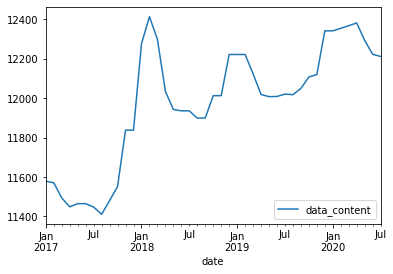

In [ ]:
ds.plot(x='date', y='data_content')

[ambil resampling](https://stackoverflow.com/questions/57487051/how-does-pandas-resample-work-for-6-month-periods)

plot data jd 2 bulan

In [ ]:
duabln = ds.set_index('date').resample('2MS').pad()

In [ ]:
duabln

,data_content
date,
2017-01-01,11579
2017-03-01,11494
2017-05-01,11465
2017-07-01,11448
2017-09-01,11481
2017-11-01,11838
2018-01-01,12276
2018-03-01,12299
2018-05-01,11943


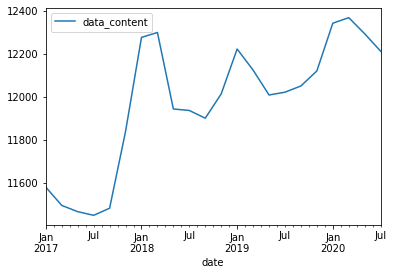

In [ ]:
duabln.plot()

plot data jd 3 bulan

In [ ]:
tigabln = ds.set_index('date').resample('3MS').pad()

In [ ]:
tigabln

,data_content
date,
2017-01-01,11579
2017-04-01,11449
2017-07-01,11448
2017-10-01,11552
2018-01-01,12276
2018-04-01,12035
2018-07-01,11936
2018-10-01,12013
2019-01-01,12222


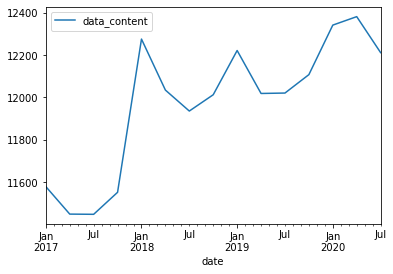

In [ ]:
tigabln.plot()

plot data jd 6 bulan

In [ ]:
enambln = ds.set_index('date').resample('6MS').pad()

In [ ]:
enambln

,data_content
date,
2017-01-01,11579
2017-07-01,11448
2018-01-01,12276
2018-07-01,11936
2019-01-01,12222
2019-07-01,12021
2020-01-01,12342
2020-07-01,12212


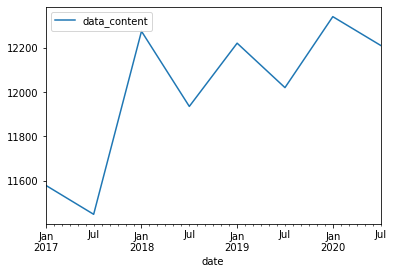

In [ ]:
enambln.plot()

dg melakukan resampling 3 dan 6 bulan terlihat bahwa pd setiap pertenghan tahun (juli) harga beras berada di harga terendah. menurut saya data tsb memiliki seasonal. untuk trend agak ragu tp kalau dilihat data tsb jga memiliki trend

lihat dekomposisi

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# additive
res_add = seasonal_decompose(tigabln, model='additive')
# mul
res_mul = seasonal_decompose(tigabln, model='multificative')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


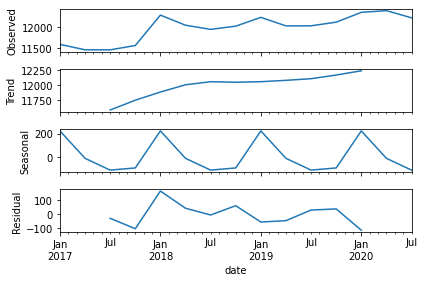

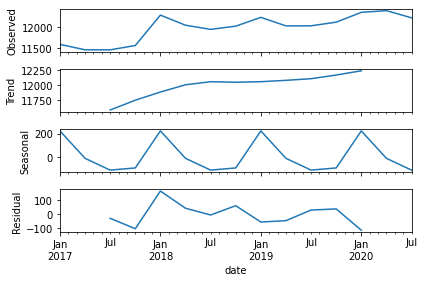

In [ ]:
res_add.plot()

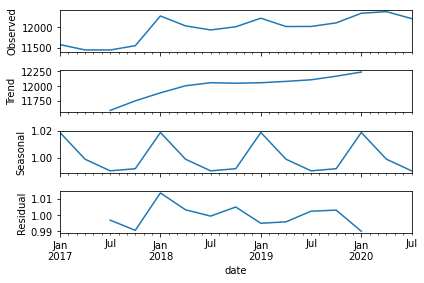

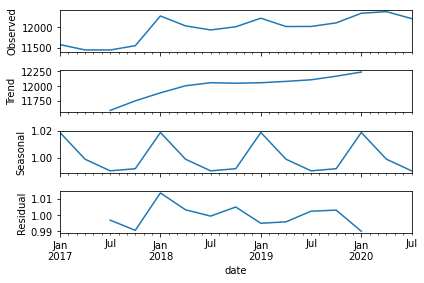

In [ ]:
res_mul.plot()

dg melihat grafik dekomposisi maka data memiliki trend dan seasonal sehingga termsk non-stationar

## uji statistik stationar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5831a6af10>]],
      dtype=object)

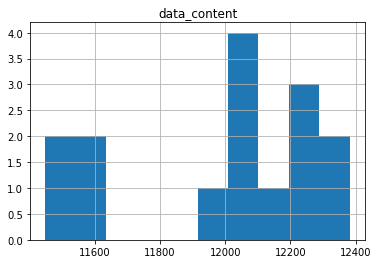

In [ ]:
tigabln.hist()

data tdk gaussian

In [ ]:
from numpy import log
X = log(tigabln)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=9.374353, mean2=9.408029
variance1=0.000718, variance2=0.000141


dari hsl perhitungan statistik(dg metode penarikan kesimpulan berdsr statistik dg membagi data jd 2 bagian) data termsk stationar karena perbedaan nilai statistiknya tdk signifikan

Kita lanjut dg metode ADF

In [ ]:
tigabln.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2017-01-01 to 2020-07-01
Freq: 3MS
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   data_content  15 non-null     int64
dtypes: int64(1)
memory usage: 240.0 bytes


In [ ]:
tigabln['data_content'].values

array([11579, 11449, 11448, 11552, 12276, 12035, 11936, 12013, 12222,
       12019, 12021, 12108, 12342, 12382, 12212])

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tigabln['data_content'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.025821
p-value: 0.275367
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


In [ ]:
stat, p, lags, obs, crit, t = adfuller(tigabln['data_content'].values)
print('stat=%.3f, p=%.3f' % (stat, p))
alfa = 0.05
if p > alfa:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-2.026, p=0.275
Probably not Stationary


untuk threshold 1% & 5%. kita pakai 5% (alfanya) sehingga data termask non-stationar


uji dg kpss

In [ ]:
from statsmodels.tsa.stattools import kpss
stat, p, lags, crit = kpss(tigabln['data_content'].values)
print('stat=%.3f, p=%.3f' % (stat, p))
alfa = 0.05
if p > alfa:
	print('Probably Stationary')
else:
	print('Probably not Stationary')

stat=0.380, p=0.086
Probably Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


hslnya adlh stationary

hsl adf dan kpss berbeda. coba dg test lain berdasarkan bacaan [ini](https://stats.stackexchange.com/questions/239360/contradictory-results-of-adf-and-kpss-unit-root-tests/239367) jd kpss akan kita bandingkan dg Leybourne-McCabe

# forecast dg CNN + LSTM

In [ ]:
tigabln['data_content'].values.shape

(15,)

In [ ]:
tigabln

,data_content
date,
2017-01-01,11579
2017-04-01,11449
2017-07-01,11448
2017-10-01,11552
2018-01-01,12276
2018-04-01,12035
2018-07-01,11936
2018-10-01,12013
2019-01-01,12222


forecasting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


t+1 RMSE: 168.987729
t+2 RMSE: 261.482804
t+3 RMSE: 296.084896


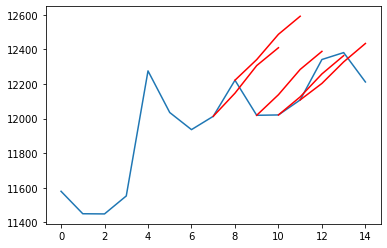

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array
 
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test
 
# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]
 
# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts
 
# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted
 
# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted
 
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))
 
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()
 
# load dataset
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# configure
n_lag = 1
n_seq = 3
n_test = 5
n_epochs = 200
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(tigabln, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(tigabln, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(tigabln, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(tigabln, forecasts, n_test+2)

model yg dihslkan jelek

# olah data harga beras untuk berita
## 3 harga tertinggi & terendah
cari 3 max(data), dan 3 min(data)


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 7 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          43 non-null     datetime64[ns]
 1   data_content  43 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


In [ ]:
# 5 data tertinggi
sort = ds.sort_values("data_content", axis = 0, ascending = False)
sort

,date,data_content
14,2018-02-01,12414
41,2020-04-01,12382
40,2020-03-01,12368
39,2020-02-01,12355
38,2020-01-01,12342
37,2019-12-01,12342
15,2018-03-01,12299
42,2020-05-01,12293
13,2018-01-01,12276
43,2020-06-01,12223


3 top harga tertinggi adlh
* 2018-02-01, 2020-04-01, 2020-03-01 

3 top harga terendah adlh
* 2017-08, 2017-07, 2017-04 

# Cari berita

In [ ]:
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome(options=options)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.4 kB]
Hit:12 http://ppa.launchpad.net/cran/

cari

In [ ]:
def cari_data(waktu):
  from selenium import webdriver
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  # open it, go to a website, and get results
  browser = webdriver.Chrome(options=options)
  key_word = "harga+beras"
  date_start='1/'+waktu
  date_end='30/'+waktu
  browser.get('https://www.google.com/search?q='+key_word+'&tbs=cdr:1,cd_min:'+date_start+',cd_max:'+date_end+'&tbm=nws')
  link = 'https://www.google.com/search?q='+key_word+'&tbs=cdr:1,cd_min:'+date_start+',cd_max:'+date_end+'&tbm=nws'
  from bs4 import BeautifulSoup
  data = []
  soup = BeautifulSoup(browser.page_source,'html.parser')
  judul = soup.find_all('div', class_='mCBkyc y355M JQe2Ld nDgy9d')
  for row in judul:
      data.append(row.get_text())
  browser.close()
  return data, link

In [ ]:
print("harga tertinggi")
# 2018-02-01, 2020-04-01, 2020-03-01
t1=cari_data('2/2018')
t2=cari_data('4/2020')
t3=cari_data('3/2020')
print(t1)
print("="*20)
print(t2)
print("="*20)
print(t3)
print("="*20)
print("harga terendah")
# 2017-08, 2017-07, 2017-04
d1=cari_data('8/2017')
d2=cari_data('7/2017')
d3=cari_data('4/2017')
print(d1)
print("="*20)
print(d2)
print("="*20)
print(d3)
print("="*20)

harga tertinggi
(['Atasi Lonjakan Harga, Pemerintah Akhirnya Mengimpor Beras 500.000 Ton - \nKompas.com', 'Harga Beras Melambung Tinggi, Mendag Gelar Rapat Mendadak', 'Harga Beras di Sidoarjo Masih Mahal Meski Bulog Sudah ...', 'Harga Beras Naik, Bulog Siapkan Operasi Pasar - Kompas.com', 'Harga Beras Naik, Kemendag Awasi Operasi Pasar', 'Banyak Daerah Panen Padi, Harga Beras di Jember Masih Tinggi', '10 Provinsi dengan Harga Beras Medium Termahal | Databoks', 'Harga Beras di Tingkat Penggilingan Periode Januari 2020 Naik', 'Harga Beras Mulai Naik di Padang', 'Harga beras mulai naik, Bulog lakukan operasi pasar'], 'https://www.google.com/search?q=harga+beras&tbs=cdr:1,cd_min:1/2/2018,cd_max:30/2/2018&tbm=nws')
(['Bulog Sebut Harga Beras Masih Meningkat hingga Februari 2022 - Kompas.com', 'Buwas Proyeksi Harga Beras Naik Januari-Februari 2022', 'Urusan Migor Belum Kelar, Beras Mau Naik Harga Lagi!', 'Mendag: Harga Beras Tidak Turun, Malah Naik', 'Harga Beras Turun Karena Kisruh Impor? I

jika kita klik link nya maka hasil dari scraping dengan link yg dibuka pd browser itu berbeda. Akan lebih baik jika memakai api google dimana data kembaliannya berupa json misalnya untuk lebih mudah dlm proses pencariannya.

Setelah diklik linknya maka kita dpt melihat alasan dibalik tinggi dan rendahnya harga beras